作为一款月活超过10亿用户的产品：微信，你考虑过你一天会有多长时间花在上面吗？

虽然当前的微信已经不仅仅只是一个社交产品了，但是核心仍然是社交，既然是社交，你确定你了解你的微信好友吗？

## 获取数据

我们借助 `itchat` 轻松抓取出个人号的微信好友。当然了，抓取数据之前需要先登录，登录之后我们就可为所欲为了，哈哈哈~

In [1]:
import itchat

# 执行后会弹出二维码，扫描验证，登录。
itchat.auto_login(hotReload=True)

登录成功后，借助`get_friends`即可获取自己的好友信息了。

In [2]:
friends = itchat.get_friends(update=True)

获得信息后，我们将需要的字段（NickName、Sex、Province、City、Signature）筛选出来，然后构建成一个DataFrame。

In [3]:
from collections import defaultdict

friends_dict = defaultdict(list)

for friend in friends:
    friends_dict["NickName"].append(friend["NickName"])
    friends_dict["Sex"].append(friend["Sex"])
    friends_dict["Province"].append(friend["Province"])
    friends_dict["City"].append(friend["City"])
    friends_dict["Signature"].append(friend["Signature"])
    friends_dict["RemarkName"].append(friend["RemarkName"])

构建了DataFrame之后，先来看下好友数量。

In [4]:
df = pd.DataFrame(friends_dict)
df.shape

(1389, 6)

## 性别

先来看看好友中的性别分布，需要注意的是，用户性别已经编码成数字了，经过验证，0表示未知、1表示男、2表示女。

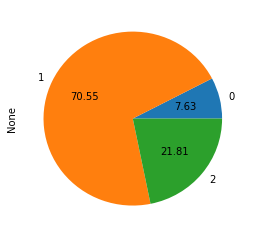

In [5]:
%matplotlib inline
df.groupby("Sex").size().plot.pie(figsize=(4, 4), autopct="%.2f");

简直是惨不忍睹，这是赤裸裸地嘲讽我啊，微信好友里7成都是男性朋友。

## 地域分布

分析完性别之后，我们来看看好友中的地域分布。默认设置下，Matplotlib 的中文输出会乱码，这会导致基于它的Pandas的绘图一样出现中文乱码。我们现在做一个设置。

In [6]:
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #用来正常显示中文标签
plt.rcParams["axes.unicode_minus"]=False #用来正常显示负号

这里我取出好友数最多的前20个省份来作图。

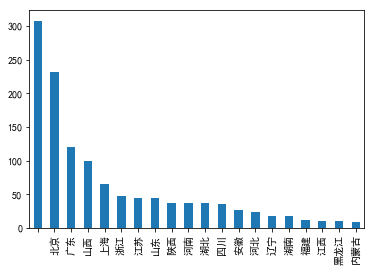

In [7]:
df.Province.value_counts()[:20].plot.bar()

结果显而易见，除了未填写地区的好友之外，北京地区的好友人数高居首位，IT人员的悲哀哪！

再来看下地区或城市的好友的分布。

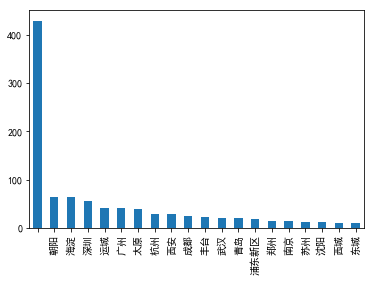

In [8]:
df.City.value_counts()[:20].plot.bar()

朝阳人民果然伟大，毫无争议的第一。

## 签名词云

现在来根据好友的签名来会绘制下词云图。

由于很多签名中包含了 emoji 表情，这会导致 Signature 字段中出现类似 `<span class="emoji emoji1f483"></span>` 字符出现，所以我们需要先去除这些字符。

Building prefix dict from C:\soft\py3\lib\site-packages\jieba\dict.txt ...
Loading model from cache C:\Users\WANGWE~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.3192026615142822 seconds.
Prefix dict has been built succesfully.


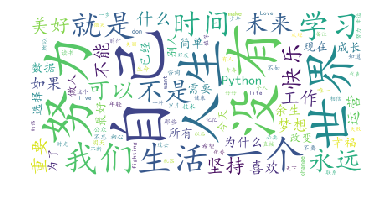

LOG OUT!


In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import jieba
import matplotlib.pyplot as plt

signs = df.Signature.str.replace("<.*?>", "", )
# 将分词后的结果以空格连接
words = " ".join(jieba.cut(signs.str.cat(sep=" ")))
# words = " ".join(jieba.cut(df.Signature.str.cat(sep=" ")))

# 设置停用词
stopwords = STOPWORDS

wc = WordCloud(stopwords=stopwords,
               font_path="C:/Windows/Fonts/simkai.ttf",  # 解决显示口字型乱码问题
               background_color="white", max_words=100)

my_wc = wc.generate_from_text(words)

plt.imshow(my_wc )
# plt.imshow(my_wc.recolor(color_func=image_colors), )
plt.axis("off")
plt.show()

从词云图中可以看到，我的好友还是非常具有正能量的，各种阳光的词汇：努力、学习、自己、生活、世界。